In [270]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error


def rmse(y_gt, y_pred):
  return mean_squared_error(y_gt, y_pred, squared=False)

# Задание 1

Выбрать подходящую таблицу данных (должна содержать числовые и категориальные переменные). Временно убрать категориальные признаки. Построить линейную регрессию.


In [230]:
df = pd.read_csv('avocado.csv')
TARGET_NAME = 'AveragePrice'

df.drop([df.columns[0]], axis=1, inplace=True)

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [231]:
df['Date'] = pd.to_datetime(df['Date'],)
df['Date'] = df['Date'].map(lambda x:  x.toordinal())

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Total Bags = Small Bags + Large Bags + XLarge Bags


Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bag


In [232]:
droped = ['Total Volume', 'Total Bags', 'year']
df.drop(droped, axis=1, inplace=True)  

numeric_columns = ['AveragePrice',
                   'Small Hass', 'Large Hass', 'XLarge Hass',
                   'Small Bags', 'Large Bags', 'XLarge Bags']

categorical_columns = ['region', 'type']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Small Hass    18249 non-null  float64
 3   Large Hass    18249 non-null  float64
 4   XLarge Hass   18249 non-null  float64
 5   Small Bags    18249 non-null  float64
 6   Large Bags    18249 non-null  float64
 7   XLarge Bags   18249 non-null  float64
 8   type          18249 non-null  object 
 9   region        18249 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.4+ MB


In [233]:
X = df.drop(categorical_columns + [TARGET_NAME], axis=1).to_numpy()
y = df[TARGET_NAME].to_numpy()
mean_target_value = np.mean(y)

In [234]:
def test_clf(clf, x_data, y_data):
  cv_res = cross_validate(clf, x_data, y_data, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
  print(f'Mean target value: {mean_target_value:.2f}')
  print('Cross-val RMSE: {0:.1e}'.format(np.sqrt(-cv_res['test_score'].mean())))

In [235]:
test_clf(LinearRegression(), X, y)

Mean target value: 1.41
Cross-val RMSE: 4.7e-01


# Задание 2
Построить решение методом бустинга. Сравнить с линейной регрессией.

In [236]:
def build_gb(x_data, y_data):
  params = {
    'n_estimators' : [200, 800],
    'max_depth' : [3, 5, 10]
  }

  grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=0), cv=3, param_grid=params, n_jobs=-1, 
                    scoring='neg_mean_squared_error')

  grid_search_gb.fit(x_data, y_data)
  print('Best params: ', grid_search_gb.best_params_)
  return grid_search_gb.best_estimator_

In [237]:
gbooster = build_gb(X, y)

Best params:  {'max_depth': 3, 'n_estimators': 800}


In [238]:
test_clf(gbooster, X, y)

Mean target value: 1.41
Cross-val RMSE: 2.6e-01


# Задание 3
Применить one hot и target encoding для категориальных признаков (взять данные, где такие признаки есть). Сравнить точность.

In [239]:
one_hot_cat = pd.get_dummies(df[categorical_columns])
one_hot_cat

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [240]:
df_onehot = pd.concat([df[numeric_columns], one_hot_cat], axis=1)

X = df_onehot.drop([TARGET_NAME], axis=1).to_numpy()
y = df_onehot[TARGET_NAME].to_numpy()

X.shape

(18249, 62)

In [241]:
test_clf(LinearRegression(), X, y)

Mean target value: 1.41
Cross-val RMSE: 2.9e-01


In [242]:
gbooster2 = build_gb(X, y)

Best params:  {'max_depth': 3, 'n_estimators': 200}


In [243]:
test_clf(gbooster2, X, y)

Mean target value: 1.41
Cross-val RMSE: 2.8e-01


In [266]:
def target_encoding(data, cat_columns, targe_name):
  res = pd.DataFrame()
  
  for column in cat_columns:
    encoded_column = data.groupby(column)[targe_name].transform('mean')
    res['tg_enc_' + column] = encoded_column
    
  return res

In [267]:
tg_encoded = target_encoding(df, categorical_columns, TARGET_NAME)
tg_encoded

,tg_enc_region,tg_enc_type
0,1.561036,1.158040
1,1.561036,1.158040
2,1.561036,1.158040
3,1.561036,1.158040
4,1.561036,1.158040
...,...,...
18244,1.261701,1.653999
18245,1.261701,1.653999
18246,1.261701,1.653999
18247,1.261701,1.653999


In [275]:
df_tg_enc = pd.concat([df[numeric_columns], tg_encoded], axis=1)
X = df_tg_enc.drop([TARGET_NAME], axis=1)
y = df_tg_enc[TARGET_NAME]

X.shape

(18249, 8)

In [269]:
test_clf(LinearRegression(), X, y)

Mean target value: 1.41
Cross-val RMSE: 2.8e-01


In [248]:
gbooster3 = build_gb(X, y)

Best params:  {'max_depth': 3, 'n_estimators': 200}


In [249]:
test_clf(gbooster3, X, y)

Mean target value: 1.41
Cross-val RMSE: 2.7e-01


# Задание 4

Визуализировать объекты (не обязательно для той же таблицы) в пространстве главных компонент.

In [272]:
pca = PCA(n_components=2)

x_reduced = pca.fit_transform(X)
x_reduced.shape

(18249, 2)

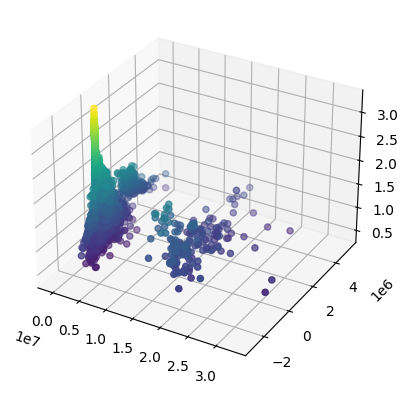

In [284]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.scatter3D(x_reduced[:,0], x_reduced[:,1], y, c=y, cmap='viridis');